# 1. Analysis and prediction of 1 random stock from dataset

In [1]:
import numpy as np
import pandas as pd 
import os
import random
import copy
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf

<ipython-input-1-53409f831dc5>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
warnings.filterwarnings('ignore')

## Importing the dataset and selecting a random stock

In [3]:
summary_exists = False
while not summary_exists:
    random_file=random.choice(os.listdir("D:/Huge Stock Market Dataset/archive/Data/Stocks"))
    tickfile=random_file.replace(".us.txt","")
    Company=yf.Ticker(tickfile)
    if 'longBusinessSummary' in Company.info.keys():
        print(random_file)
        print(Company.info['longBusinessSummary'])
        summary_exists = True

codi.us.txt
Compass Diversified is a private equity firm specializing in add on acquisitions, buyouts, industry consolidation, recapitalization, late stage and middle market investments. It seeks to invest in niche industrial or branded consumer companies, manufacturing, distribution, consumer products, business services sector, safety & security, electronic components, food, foodservice. The firm prefers to invest in companies based in North America. It seeks to invest between $100 million and $800 million in companies with an EBITDA between $15 million to $80 million. It seeks to acquire controlling ownership interests in its portfolio companies and can make additional platform acquisitions. The firm prefer to have majority stake in companies. The firm invests through its balance sheet and typically holds investments between five to seven years. Compass Diversified was founded in 2005 and is based in Westport, Connecticut with an additional office in Irvine, California.


In [4]:
##print(Company.info['longBusinessSummary'])

In [5]:
df = pd.read_csv("D:/Huge Stock Market Dataset/archive/Data/Stocks/"+random_file).fillna(0)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2006-05-10,8.3510,8.3510,8.3510,8.3510,0,0
1,2006-05-11,8.0996,8.4891,7.7986,8.3675,6442107,0
2,2006-05-12,8.4343,8.4343,8.3510,8.3719,169370,0
3,2006-05-15,8.4060,8.4060,8.3510,8.3675,35476,0
4,2006-05-16,8.3510,8.3719,8.3510,8.3719,52936,0


In [6]:
print(df.head())
print(df.shape)
print(df.size)
print(df.columns)

         Date    Open    High     Low   Close   Volume  OpenInt
0  2006-05-10  8.3510  8.3510  8.3510  8.3510        0        0
1  2006-05-11  8.0996  8.4891  7.7986  8.3675  6442107        0
2  2006-05-12  8.4343  8.4343  8.3510  8.3719   169370        0
3  2006-05-15  8.4060  8.4060  8.3510  8.3675    35476        0
4  2006-05-16  8.3510  8.3719  8.3510  8.3719    52936        0
(2898, 7)
20286
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


## Basic Plot of Closing Price 

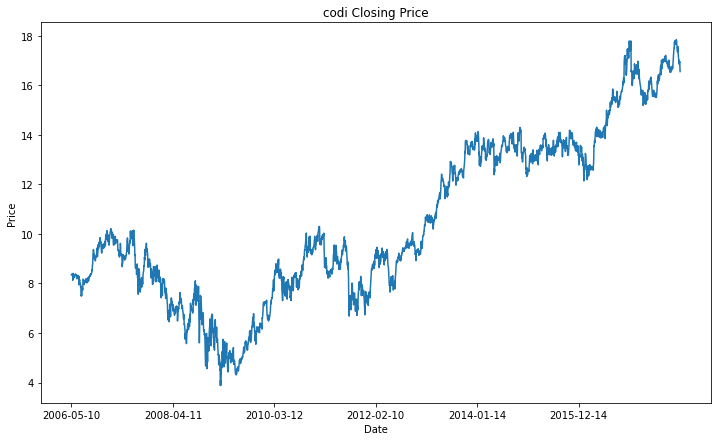

In [7]:
plt.figure(figsize=(12,7))
length=len(df['Date'])
X=df['Date']
Y=df['Close']
plt.plot(X,Y)
plt.xlabel("Date")
plt.ylabel("Price")
cname=random_file.replace(".us.txt","")
plt.title(cname+' Closing Price')
plt.xticks(np.arange(0,length, int(length/6)), df['Date'][0:length:int(length/6)])
plt.show()


## Plot of Volume of stock traded over time

Text(0.5, 1.0, 'codi Cumulative Volume of stock traded')

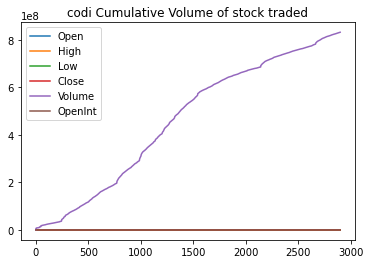

In [8]:
dr = df.cumsum()
dr.plot()
plt.title(cname+' Cumulative Volume of stock traded')

## Correlation of opening price for f=date y(t) and y(t+5)

Text(0.5, 1.0, 'codi Correlation plot for date y(t) and y(t+5)')

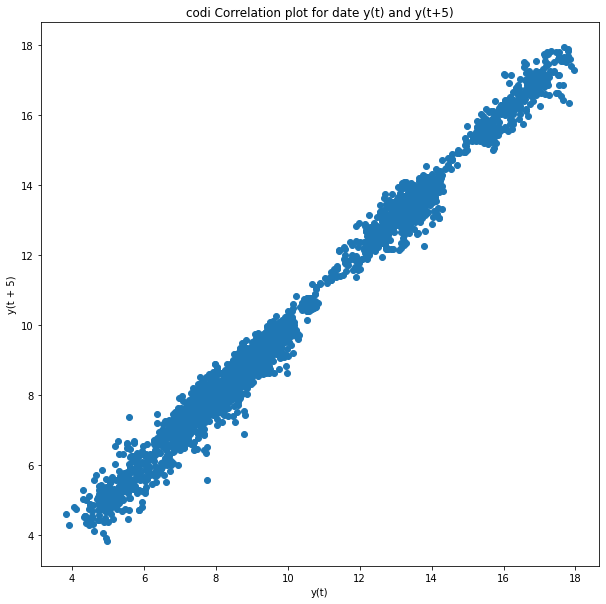

In [9]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title(cname+' Correlation plot for date y(t) and y(t+5)')

In [10]:
length=len(df['Date'])
print(length)
quart=int(length/6)

2898


## Plot of stock price wrt date and segregation of train and test data

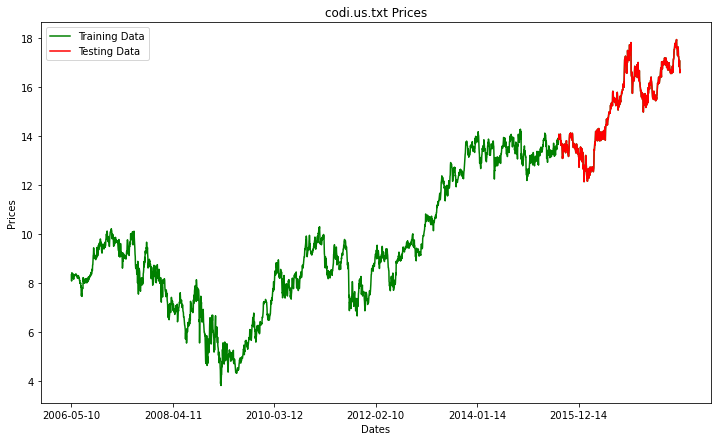

In [11]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(random_file+' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'green', label='Training Data')
plt.plot(test_data['Open'], 'red', label='Testing Data')
plt.xticks(np.arange(0,length, quart), df['Date'][0:length:quart])
plt.legend()

## Prediction using ARIMA (Auto Regressive Integrated Moving Average)

In [12]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))


In [13]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.031
Symmetric mean absolute percentage error: 11.640


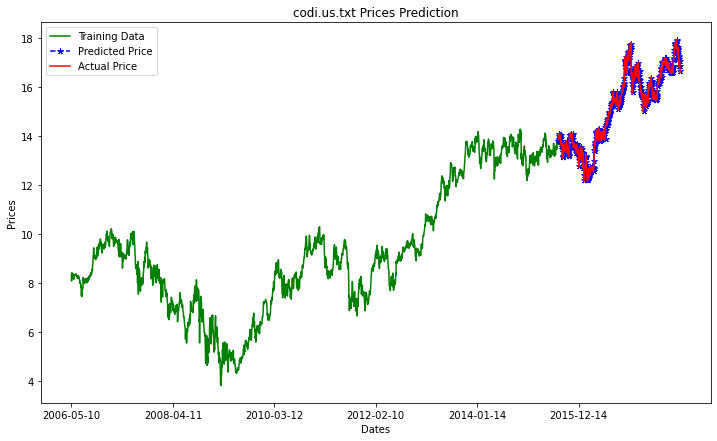

In [14]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='green', label='Training Data')
plt.plot(test_data.index, predictions, color='blue', marker=(5,2), linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title(random_file+' Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,length, quart), df['Date'][0:length:quart])
plt.legend()

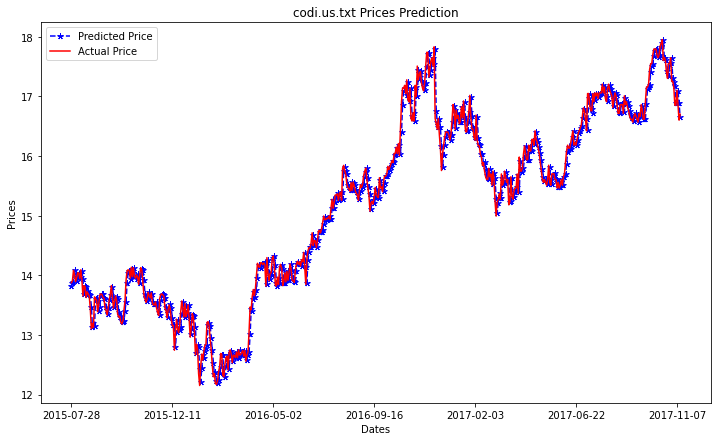

In [15]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='blue', marker=(5,2), linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title(random_file+' Prices Prediction')
plt.xticks(np.arange(int(0.8*(length)),(length-1), int(quart/5)), df['Date'][int(0.8*(length)):(length-1):int(quart/5)])
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# Indicator Analysis of above stock and 3 random stocks from the dataset

In [16]:
os.chdir("D:/Huge Stock Market Dataset/archive/Data/Stocks")
list = os.listdir()
#number_files = len(list)
#print(number_files)

In [17]:
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') and os.path.getsize(os.path.join('',x)) > 0], 4)
filenames[0]=random_file
print(filenames)

['codi.us.txt', 'ggt_b.us.txt', 'wsbf.us.txt', 'jpm_g.us.txt']


In [18]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [50]:
for i in range(4):
    print(data[i].shape)
    print(data[i].size)
    print(data[i].head())
    print("\n")
    

(2898, 8)
23184
        Date    Open    High     Low   Close   Volume  OpenInt Label
0 2006-05-10  8.3510  8.3510  8.3510  8.3510        0        0  codi
1 2006-05-11  8.0996  8.4891  7.7986  8.3675  6442107        0  codi
2 2006-05-12  8.4343  8.4343  8.3510  8.3719   169370        0  codi
3 2006-05-15  8.4060  8.4060  8.3510  8.3675    35476        0  codi
4 2006-05-16  8.3510  8.3719  8.3510  8.3719    52936        0  codi


(1054, 8)
8432
        Date    Open    High     Low   Close  Volume  OpenInt  Label
0 2010-08-24  22.802  22.802  22.793  22.793     442        0  ggt_b
1 2010-08-25  22.856  22.856  22.856  22.856     221        0  ggt_b
2 2010-08-26  22.793  22.793  22.793  22.793     335        0  ggt_b
3 2010-09-01  22.802  22.802  22.765  22.765    4180        0  ggt_b
4 2010-09-02  22.784  22.829  22.774  22.829    3849        0  ggt_b


(3040, 8)
24320
        Date    Open    High     Low   Close   Volume  OpenInt Label
0 2005-10-05  9.0854  9.4648  8.9677  9.3008  183326

In [20]:
print(len(data))

4


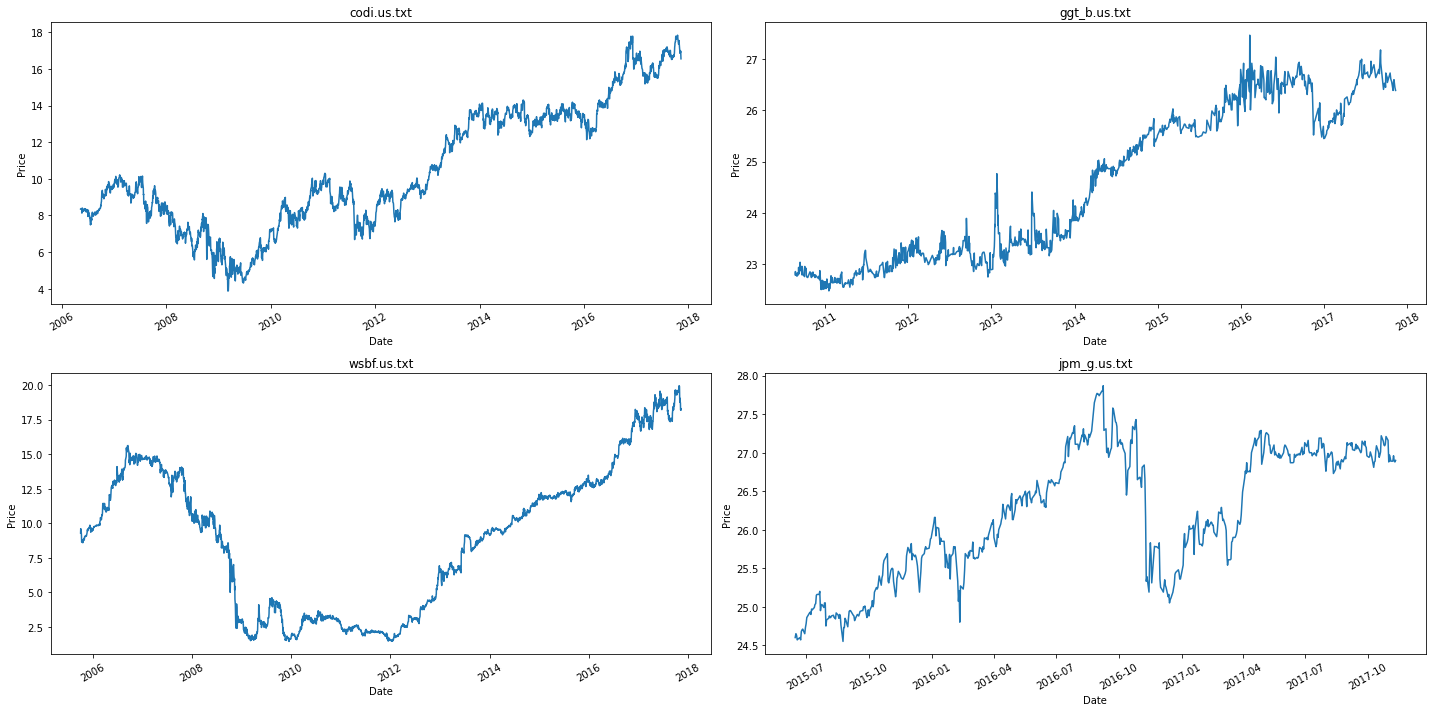

In [21]:
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(data[i]['Date'], data[i]['Close'])
    ax.set_title(filenames[i])
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()

In [22]:
StockVisual = copy.deepcopy(data)


## RSI (Relative Strength Index)
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 
The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.
The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.
An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

In [23]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [24]:
for stock in range(len(StockVisual)):
    StockVisual[stock]['Momentum'] = (StockVisual[stock]['Close']-StockVisual[stock]['Close'].shift(1)).fillna(0)
    StockVisual[stock]['RSI_C'] = StockVisual[stock]['Momentum'].rolling(center=False, window=14).apply(rsi).fillna(0)

# Volume of Stock Traded 

In [25]:
### Calculation of Volume 
for stock in range(len(StockVisual)):
    StockVisual[stock]['Volume_plain'] = StockVisual[stock]['Volume'].fillna(0)
#StockVisual[0].tail()

## Bollinger Bands 
Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price.

When the bands tighten during a period of low volatility, it raises the likelihood of a sharp price move in either direction. This may begin a trending move. Watch out for a false move in opposite direction which reverses before the proper trend begins.
When the bands separate by an unusual large amount, volatility increases and any existing trend may be ending. 
Prices have a tendency to bounce within the bands' envelope, touching one band then moving to the other band. You can use these swings to help identify potential profit targets. For example, if a price bounces off the lower band and then crosses above the moving average, the upper band then becomes the profit target. 
Price can exceed or hug a band envelope for prolonged periods during strong trends. On divergence with a momentum oscillator, you may want to do additional research to determine if taking additional profits is appropriate for you. 
A strong trend continuation can be expected when the price moves out of the bands. However, if prices move immediately back inside the band, then the suggested strength is negated.

In [26]:
def bbands(price, length=20, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [27]:
for stock in range(len(StockVisual)):
    StockVisual[stock]['BB_Middle_Band'], StockVisual[stock]['BB_Upper_Band'], StockVisual[stock]['BB_Lower_Band'] = bbands(StockVisual[stock]['Close'], length=20, numsd=2)
    StockVisual[stock]['BB_Middle_Band'] = StockVisual[stock]['BB_Middle_Band'].fillna(0)
    StockVisual[stock]['BB_Upper_Band'] = StockVisual[stock]['BB_Upper_Band'].fillna(0)
    StockVisual[stock]['BB_Lower_Band'] = StockVisual[stock]['BB_Lower_Band'].fillna(0)
#StockVisual[0].tail()

## Aroon Oscillator
The Aroon Oscillator is a trend-following indicator that uses aspects of the Aroon Indicator (Aroon Up and Aroon Down) to gauge the strength of a current trend and the likelihood that it will continue. Readings above zero indicate that an uptrend is present, while readings below zero indicate that a downtrend is present. Traders watch for zero line crossovers to signal potential trend changes. They also watch for big moves, above 50 or below -50 to signal strong price moves.

The Aroon Oscillator uses Aroon Up and Aroon Down to create the oscillator.
Aroon Up and Aroon Down measure the number of periods since the last 25-period high and low.
The Aroon Oscillator crosses above the zero line when Aroon Up moves above Aroon Down. The oscillator drops below the zero line when the Aroon Down moves below the Aroon Up.


In [28]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [29]:
for stock in range(len(StockVisual)):
    listofzeros = [0] * 25
    up, down = aroon(StockVisual[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * StockVisual[stock].shape[0]
        StockVisual[stock]['Aroon_Oscillator'] = aroon_list
    else:
        StockVisual[stock]['Aroon_Oscillator'] = listofzeros+aroon_list

## Moving Average Convergence Divergence
Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

In [30]:
for stock in range(len(StockVisual)):
    StockVisual[stock]['26_ema'] = StockVisual[stock]['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    StockVisual[stock]['12_ema'] = StockVisual[stock]['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    StockVisual[stock]['MACD'] = StockVisual[stock]['12_ema'] - StockVisual[stock]['26_ema']
    StockVisual[stock] = StockVisual[stock].fillna(0)
#StockVisual[2].tail()

## Kaufman's Adaptive Moving Average
Kaufman's Adaptive Moving Average (KAMA) is a moving average designed to account for market noise or volatility. KAMA will closely follow prices when the price swings are relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices from a greater distance. This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

In [31]:
def KAMA(price, n=10, pow1=2, pow2=30):
    absDiffx = abs(price - price.shift(1) )  
    Change = abs( price - price.shift(n) )
    Volatility = absDiffx.rolling(window=n,center=False).sum()
    ER = Change / Volatility
    sc = ( ER*(2.0/(pow1+1)-2.0/(pow2+1.0))+2/(pow2+1.0) ) ** 2.0
    answer = np.zeros(sc.size)
    N = len(answer)
    first_value = True

    for i in range(N):
        if sc[i] != sc[i]:
            answer[i] = np.nan
        else:
            if first_value:
                answer[i] = price[i]
                first_value = False
            else:
                answer[i] = answer[i-1] + sc[i] * (price[i] - answer[i-1])
    return answer

for stock in range(len(StockVisual)):
    StockVisual[stock]['KAMA'] = KAMA(StockVisual[stock]['Close'])
    StockVisual[stock] = StockVisual[stock].fillna(0)
#StockVisual[4].tail()

## Money Flow Index
The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.
Unlike conventional oscillators such as the Relative Strength Index (RSI), the Money Flow Index incorporates both price and volume data, as opposed to just price. For this reason, some analysts call MFI the volume-weighted RSI.
The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data.
An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds.
A divergence between the indicator and price is noteworthy. For example, if the indicator is rising while the price is falling or flat, the price could start rising.

## Calculation of Money Flow Index
Typical Price = (High + Low + Close)/3

Raw Money Flow = Typical Price x Volume

The money flow is divided into positive and negative money flow.

Positive money flow is calculated by adding the money flow of all the days where the typical price is higher than the previous day's typical price.
Negative money flow is calculated by adding the money flow of all the days where the typical price is lower than the previous day's typical price.
If typical price is unchanged then that day is discarded.
Money Flow Ratio = (14-period Positive Money Flow)/(14-period Negative Money Flow)

Money Flow Index = 100 - 100/(1 + Money Flow Ratio)

In [32]:
def MFI(df):
    df['tp'] = (df['High']+df['Low']+df['Close'])/3
    df['rmf'] = df['tp'] * df['Volume']
    df['pmf'] = np.where(df['tp'] > df['tp'].shift(1), df['tp'], 0)
    df['nmf'] = np.where(df['tp'] < df['tp'].shift(1), df['tp'], 0)
    df['mfr'] = df['pmf'].rolling(window=14,center=False).sum()/df['nmf'].rolling(window=14,center=False).sum()
    df['Money_Flow_Index'] = 100 - 100 / (1 + df['mfr'])

In [33]:
for stock in range(len(StockVisual)):
    MFI(StockVisual[stock])
    StockVisual[stock] = StockVisual[stock].fillna(0)
#StockVisual[2].tail()

## Williams %R
Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. 
The Williams %R may be used to find entry and exit points in the market. It compares a stock’s closing price to the high-low range over a specific period, typically 14 days or periods.
Williams %R moves between zero and -100.
A reading above -20 is overbought.
A reading below -80 is oversold.
An overbought or oversold reading doesn't mean the price will reverse. Overbought simply means the price is near the highs of its recent range, and oversold means the price is in the lower end of its recent range.
Can be used to generate trade signals when the price and the indicator move out of overbought or oversold territory.

## Calculation of William %R
%R = -100 * ( ( Highest High - Close) / ( Highest High - Lowest Low ) )

In [34]:
def WillR(df):
    highest_high = df['High'].rolling(window=14,center=False).max()
    lowest_low = df['Low'].rolling(window=14,center=False).min()
    df['WillR'] = (-100) * ((highest_high - df['Close']) / (highest_high - lowest_low))

In [35]:
for stock in range(len(StockVisual)):
    WillR(StockVisual[stock])
    StockVisual[stock] = StockVisual[stock].fillna(0)
#StockVisual[2].tail()

# Min and Max Volume

In [36]:
#Rolling Min,Max over 14 day window
def MINMAX(df):
    df['MIN_Volume'] = df['Volume'].rolling(window=14,center=False).min()
    df['MAX_Volume'] = df['Volume'].rolling(window=14,center=False).max()

In [37]:
for stock in range(len(StockVisual)):
    MINMAX(StockVisual[stock])
    StockVisual[stock] = StockVisual[stock].fillna(0)
#StockVisual[2].tail()

# Visualizations


## 1. RSI 

In [38]:
import pandas
for stock in range(len(StockVisual)):
    StockVisual[stock].index = StockVisual[stock]['Date']
    StockVisual[stock] = StockVisual[stock].drop(labels = ['Date'], axis = 1)

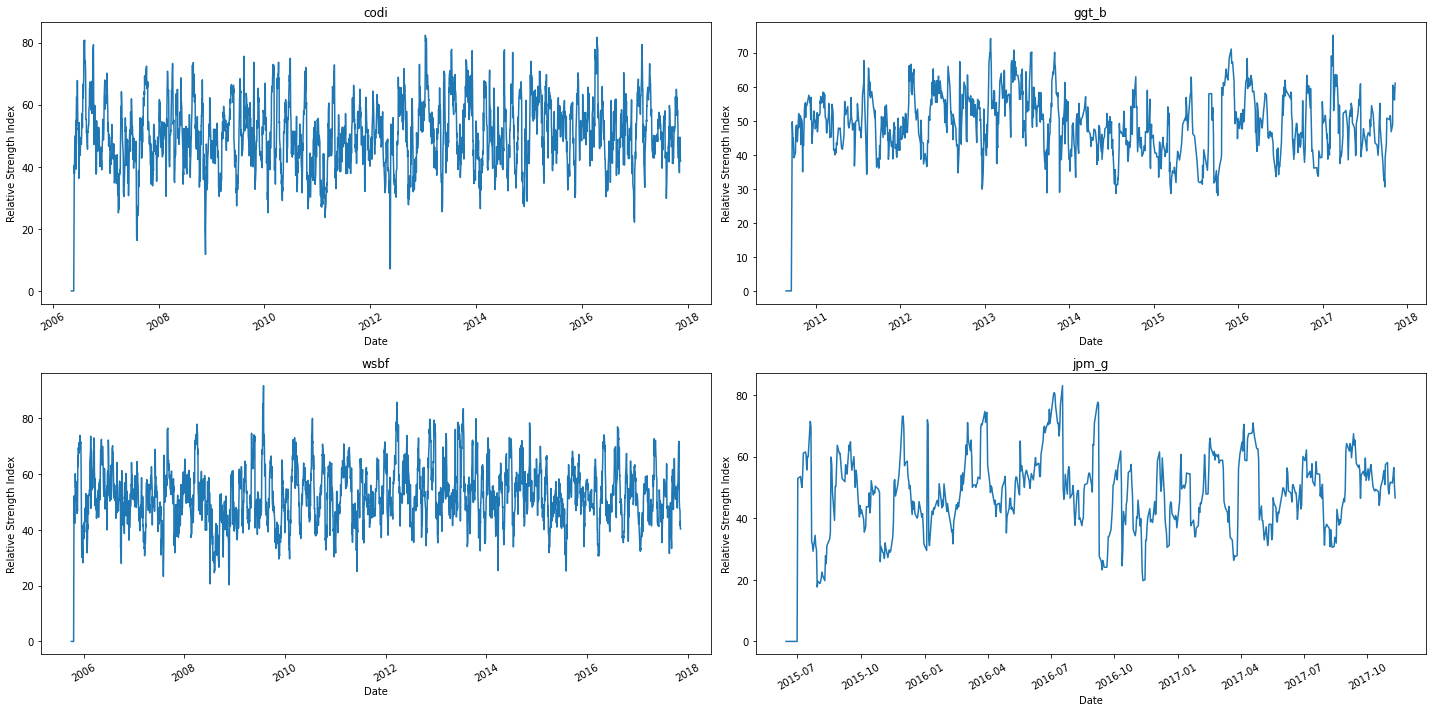

In [39]:
%matplotlib inline
# RSI Plot
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['RSI_C'])
    ax.set_title(str(StockVisual[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

## 2. Volume

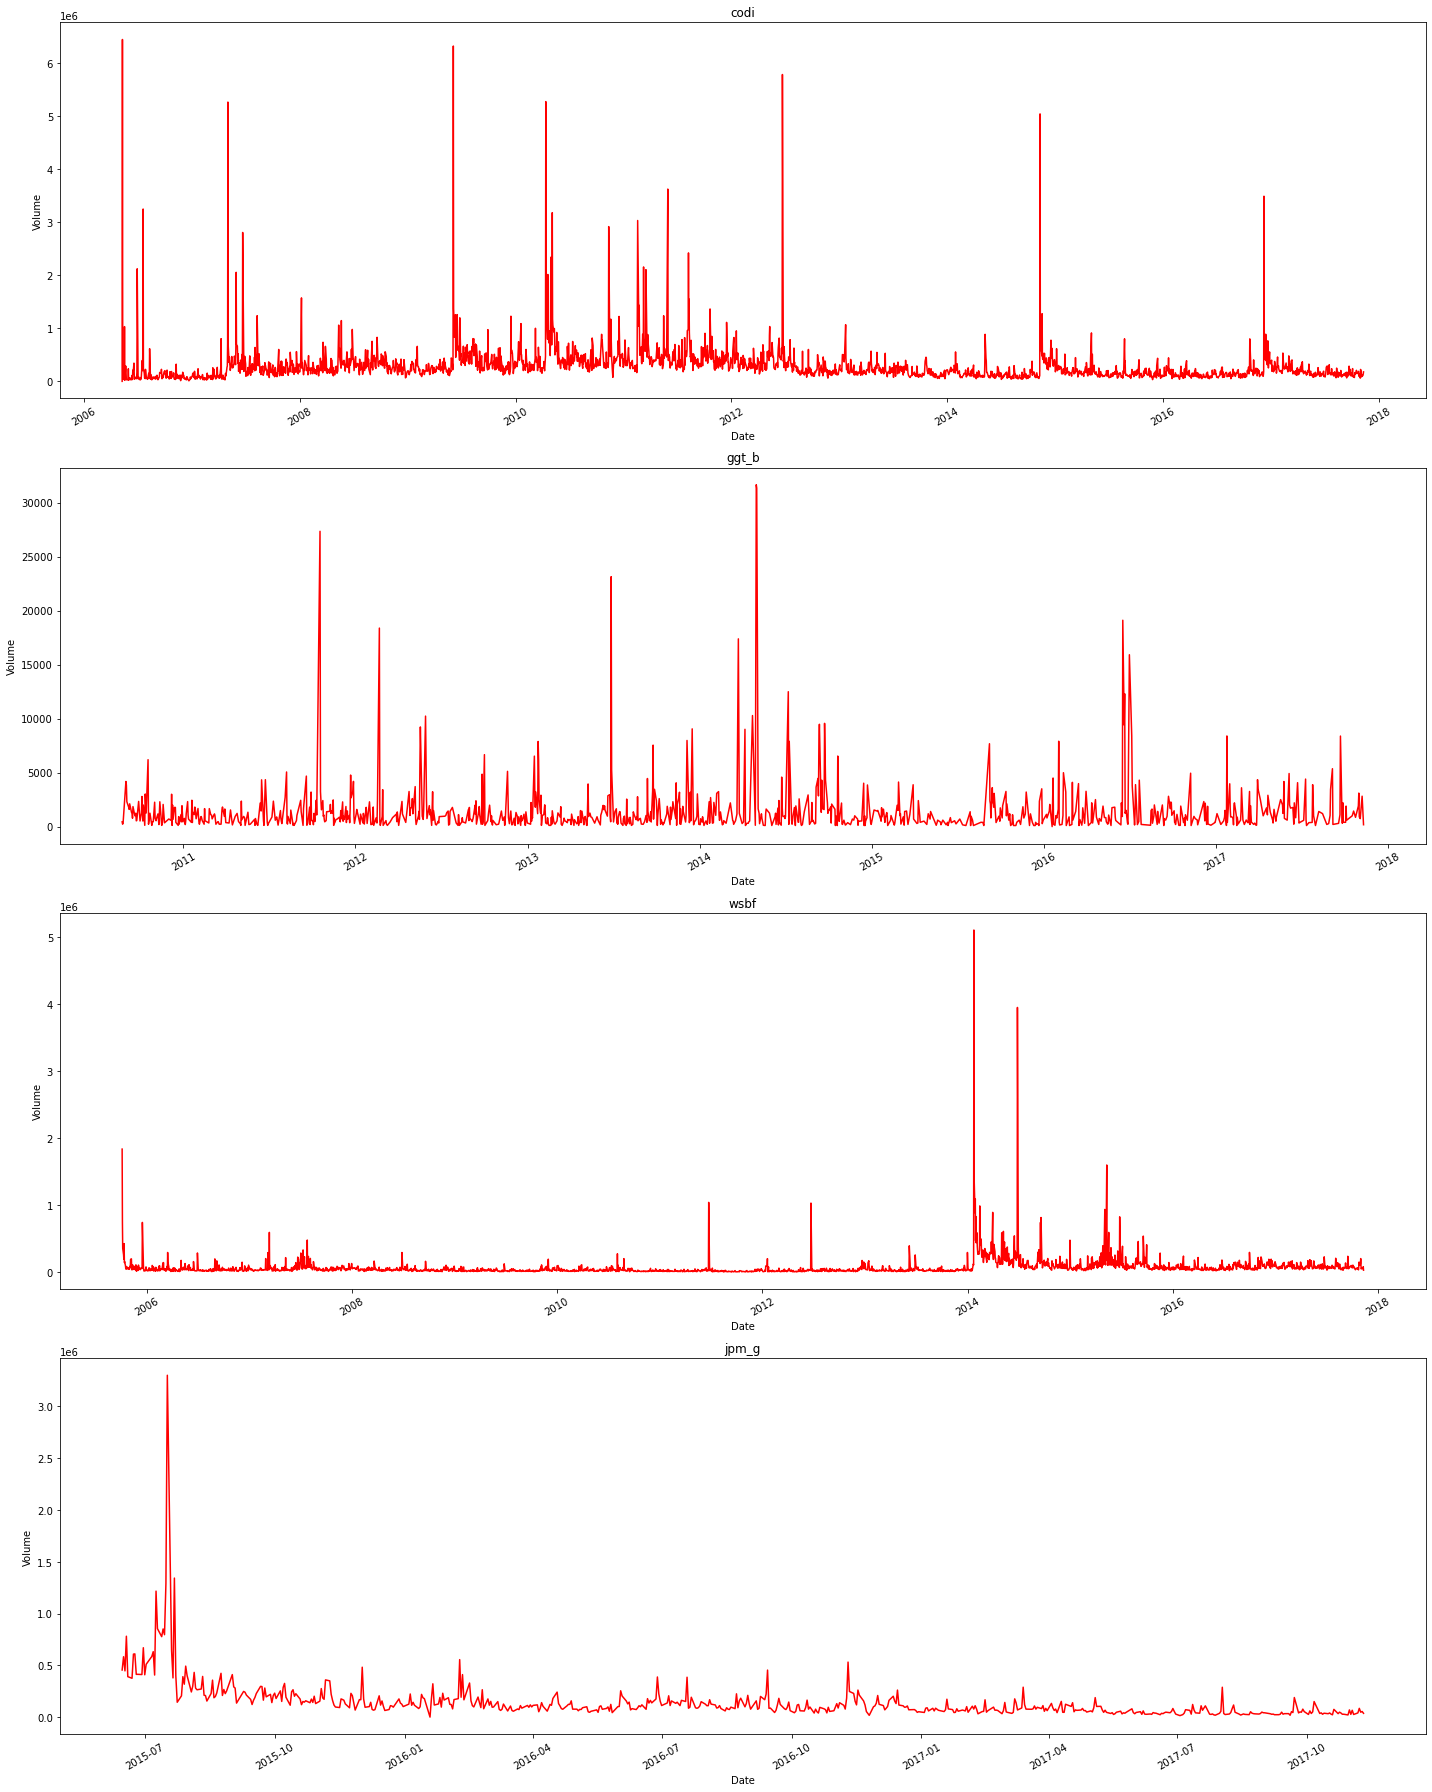

In [40]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,1,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['Volume_plain'], 'r')
    ax.set_title(str(StockVisual[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

## 3. Bollinger Bands

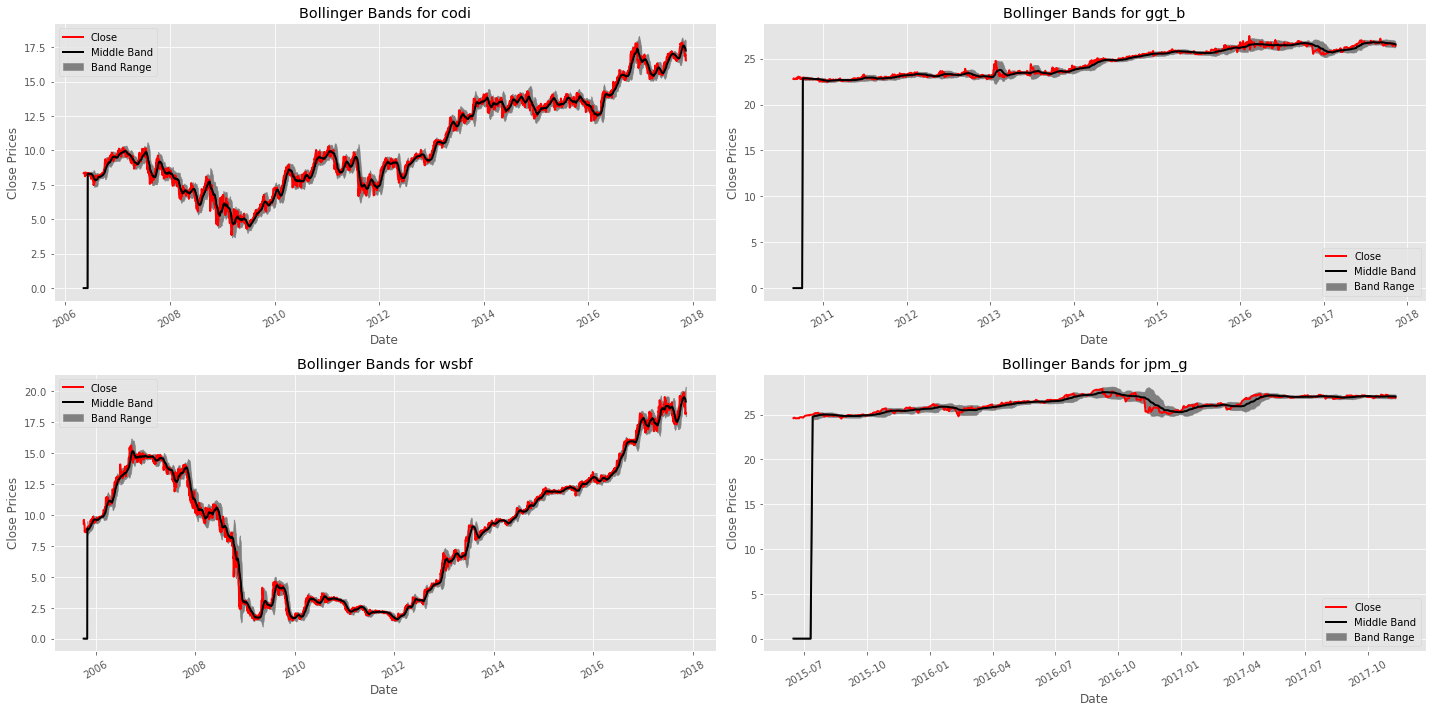

In [41]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.fill_between(StockVisual[i].index, StockVisual[i]['BB_Upper_Band'], StockVisual[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(StockVisual[i].index, StockVisual[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(StockVisual[i].index, StockVisual[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(StockVisual[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

## 4. Aroon Oscillator

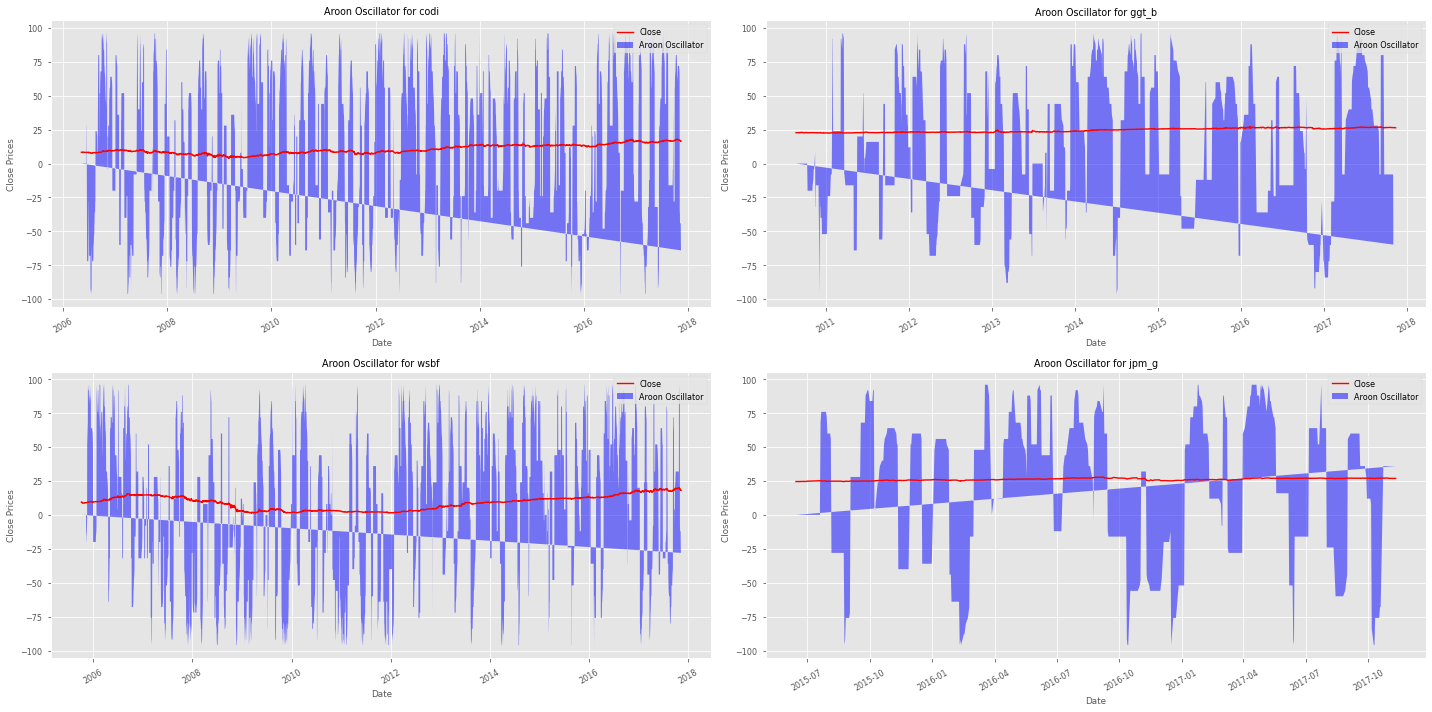

In [42]:
plt.style.use('seaborn-paper')
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.fill(StockVisual[i].index, StockVisual[i]['Aroon_Oscillator'],'b', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(StockVisual[i].index, StockVisual[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(StockVisual[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

## 5. MACD and KAMA

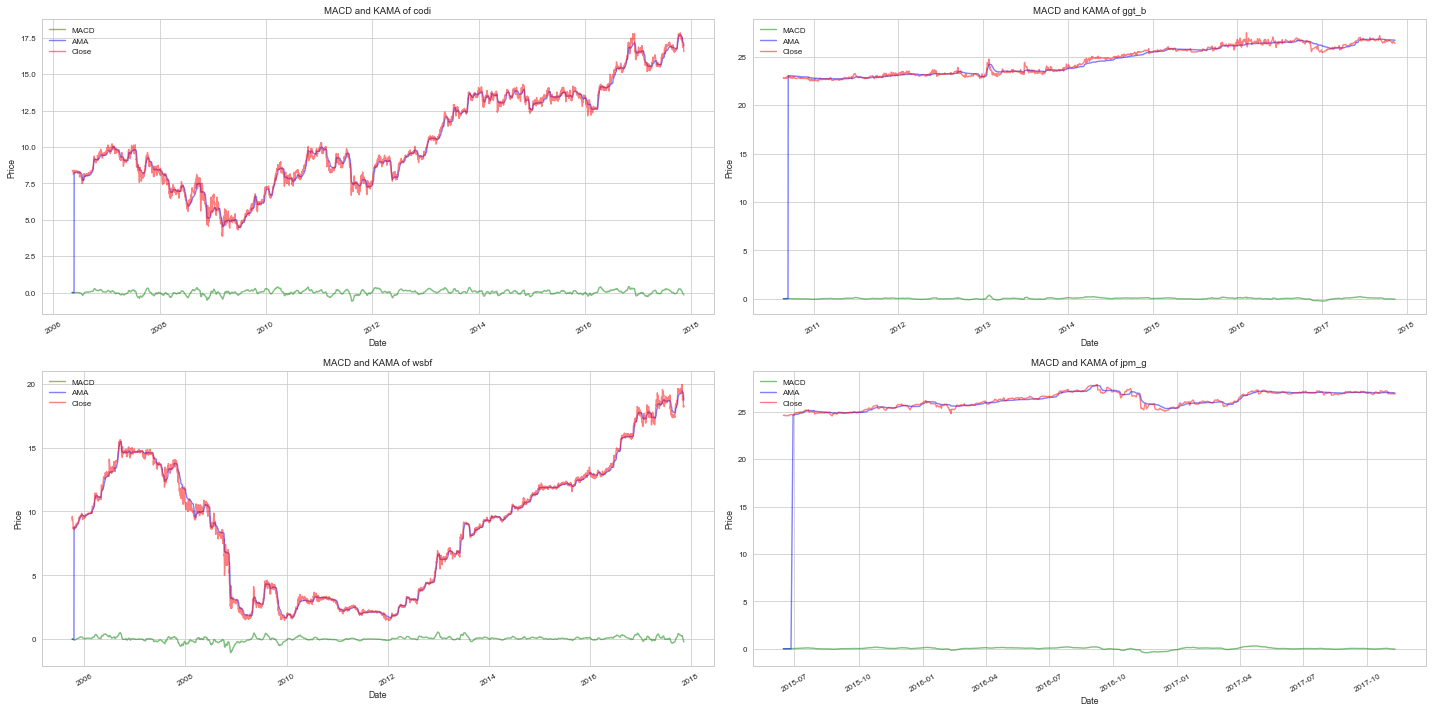

In [43]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['MACD'], 'green', label="MACD", alpha = 0.5)
    ax.plot(StockVisual[i].index, StockVisual[i]['KAMA'], 'blue', label="AMA", alpha = 0.5)
    ax.plot(StockVisual[i].index, StockVisual[i]['Close'], 'red', label="Close", alpha = 0.5)
    ax.set_title("MACD and KAMA of " +str(StockVisual[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()

## 6. Money Flow Index

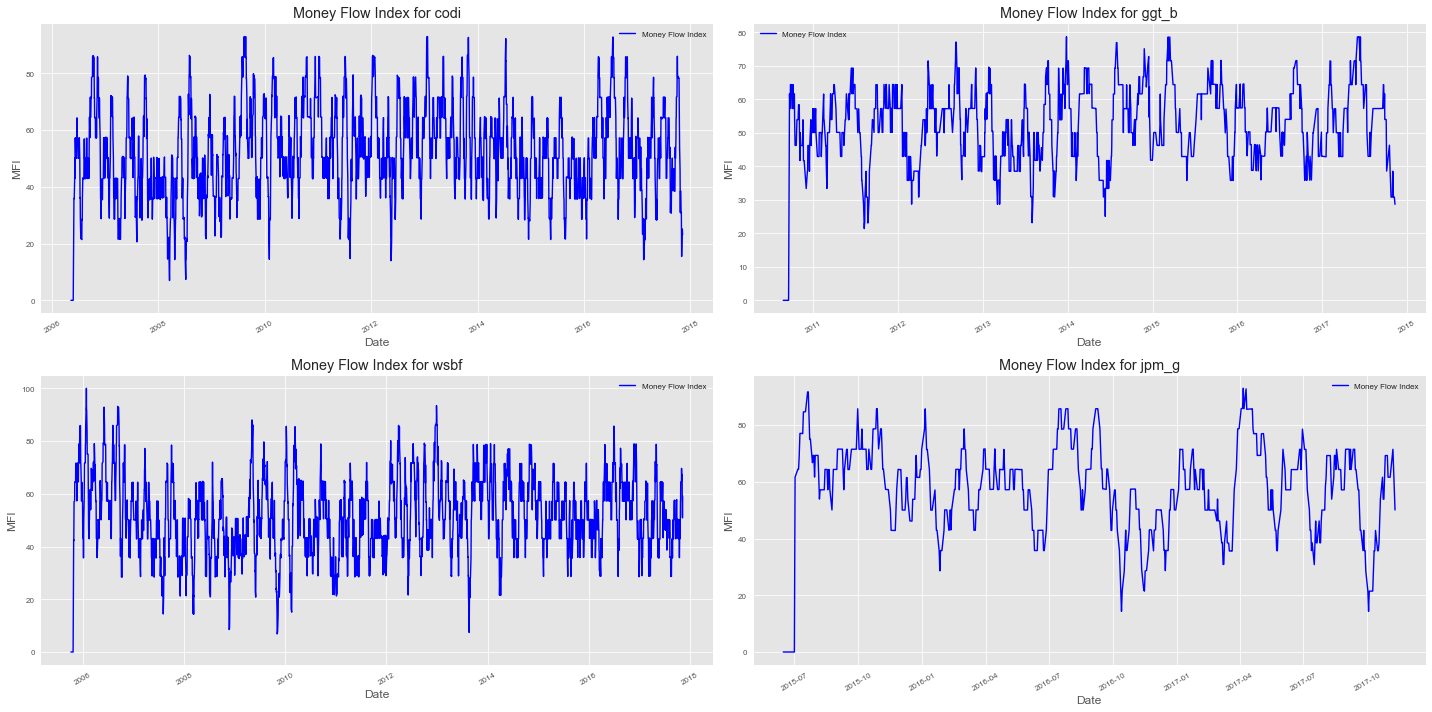

In [44]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['Money_Flow_Index'], 'blue', label="Money Flow Index")
    ax.set_title("Money Flow Index for " +str(StockVisual[i]['Label'][0]))
    ax.set_ylabel("MFI")
    ax.set_xlabel("Date")
    ax.legend() 
    plt.xticks(rotation=30)
fig.tight_layout()

## 7. William %R

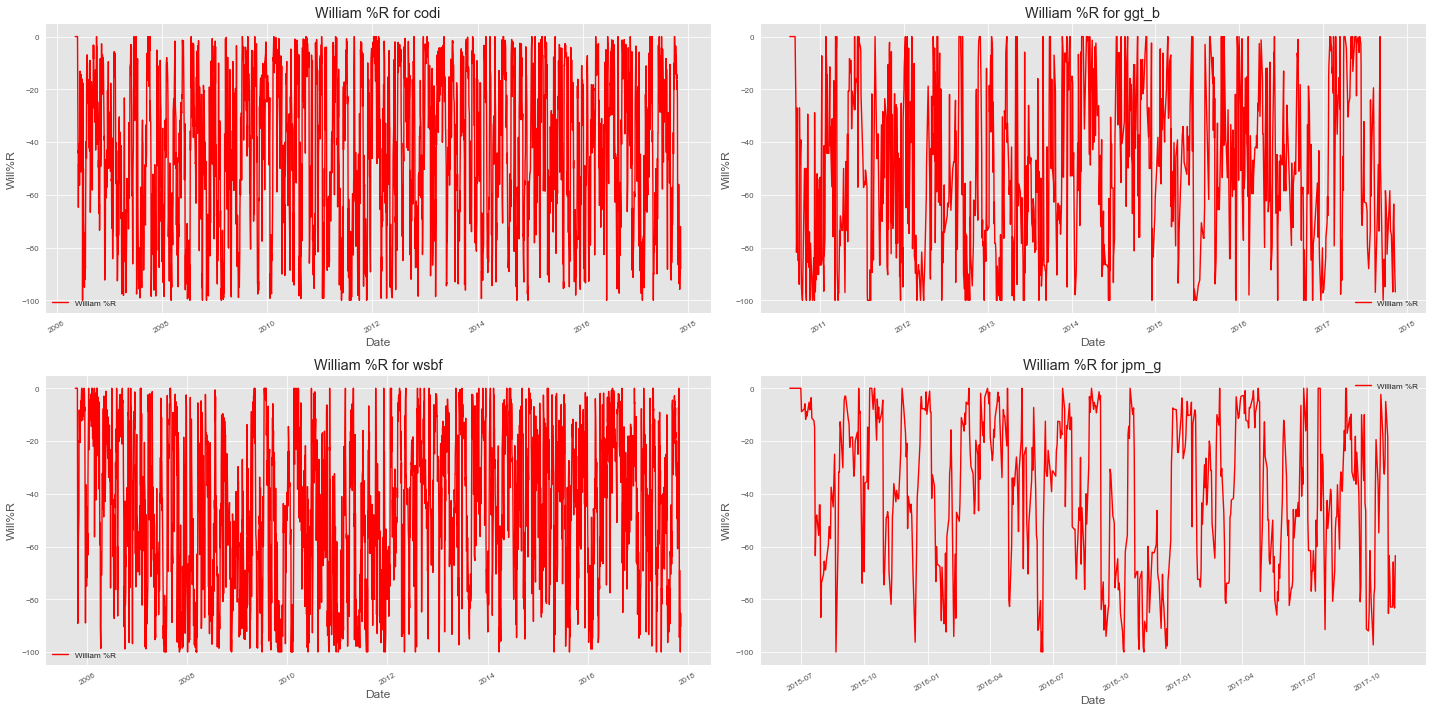

In [45]:
# William %R
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['WillR'], 'red', label="William %R")
    ax.set_title("William %R for " +str(StockVisual[i]['Label'][0]))
    ax.set_ylabel("Will%R")
    ax.set_xlabel("Date")
    ax.legend() 
    plt.xticks(rotation=30)
fig.tight_layout()

## 8. Volume MIN_MAX

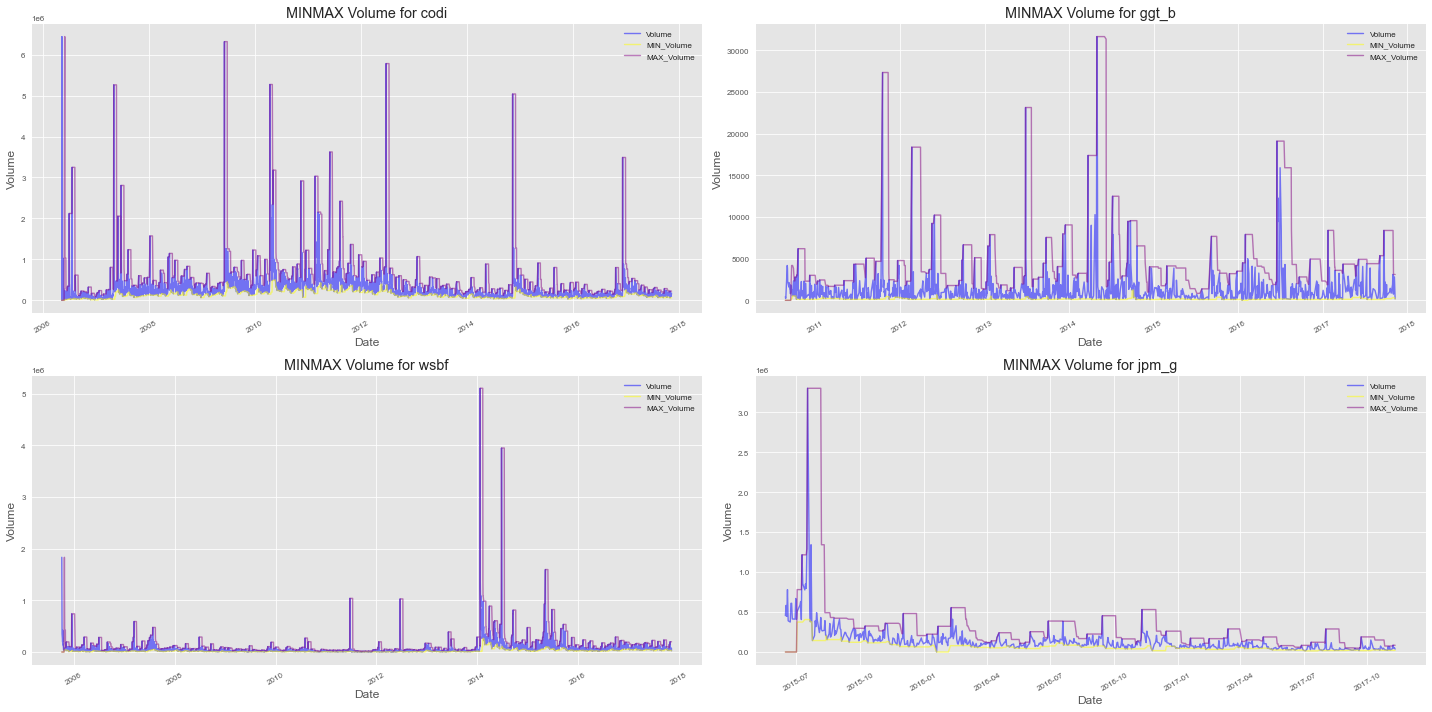

In [46]:
fig = plt.figure(figsize=(20,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(StockVisual[i].index, StockVisual[i]['Volume'], 'blue', label="Volume", alpha = 0.5)
    ax.plot(StockVisual[i].index, StockVisual[i]['MIN_Volume'], 'yellow', label="MIN_Volume", alpha = 0.5)
    ax.plot(StockVisual[i].index, StockVisual[i]['MAX_Volume'], 'purple', label="MAX_Volume",  alpha = 0.5)
    ax.set_title("MINMAX Volume for " +str(StockVisual[i]['Label'][0]))
    ax.set_ylabel("Volume")
    ax.set_xlabel("Date")
    ax.legend() 
    plt.xticks(rotation=30)
fig.tight_layout()